Meriselle Ruotolo
Midterm Project

In [22]:
import struct
import gzip
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.display import Image
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC, SVR # possibly unnecessary
from mpl_toolkits.mplot3d import Axes3D

In this assignment,... words words words explanation least squares binary classifier linear regression model stuff

The first several cells below is simply set up and testing that the data has been properly imported and set up.

In [3]:
train = dict()
test = dict()

In [4]:
def get_images(filename):
    with gzip.GzipFile(Path(filename), 'rb') as f:
        magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        print(magic, size, rows, cols)
        images = np.frombuffer(f.read(), dtype=np.dtype('B'))
        return images.reshape(size, rows, cols)
        

In [5]:
train['image'] = get_images('train-images-idx3-ubyte.gz')
test['image'] = get_images('t10k-images-idx3-ubyte.gz')
print(train['image'].shape, test['image'].shape)

2051 60000 28 28
2051 10000 28 28
(60000, 28, 28) (10000, 28, 28)


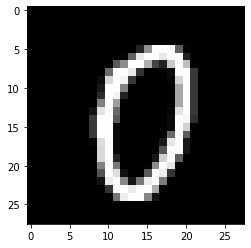

In [6]:
fig, ax = plt.subplots()
_ = ax.imshow(train['image'][1000], cmap = 'gray')

In [7]:
def get_labels(filename):
    with gzip.GzipFile(Path(filename), 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.dtype('B'))
    return labels

In [8]:
train['label'] = get_labels('train-labels-idx1-ubyte.gz')
test['label'] = get_labels('t10k-labels-idx1-ubyte.gz')
print(train['label'].shape, test['label'].shape)

(60000,) (10000,)


In [9]:
# Checking to see if the labels are within the expected values
np.unique(train['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**PART I**

In part one, we will be taking a least-squares binary classifer and creating a classifer for each specific digit [0-9]. We will then test our classifier with the handwritten mnist digit set and count the number of correctly identified hand-written digits using our classifier. We will anaylze its accuracy. 
The least-squares binary classifer we will be using is the linear regression module.

**LEAST SQUARES LINEAR REGRESSION AS A BINARY CLASSIFIER:**
First, we must partition our data to x and y axis. We will be training our binary classifer with the "training set." 

__We will set up the x and y axis for the training set for the digit zero:__

In [57]:
x0 = np.zeros((60000, 28 * 28))
y0 = np.zeros((60000,))

for i in range(len(train['image'])):
    x0[i] = train['image'][i].flatten()
    y0[i] = 1 if train['label'][i] == 0 else -1

-1.0

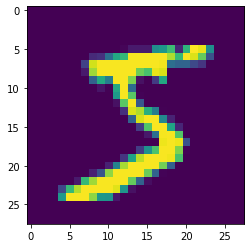

In [66]:
# Checking if data was properly imported
plt.imshow(x0[0].reshape((28, 28)))
y0[0] 

As you can see from above, the image shown is the handwritten digit 5, so the y returned is -1, as it is not the handwritten digit 0.

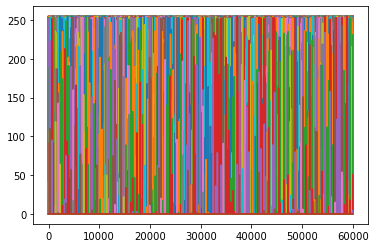

In [90]:
plt.plot(x0)
plt.show()